In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from matplotlib import pyplot as plt

df_projected = pd.read_csv("https://raw.githubusercontent.com/juandavid7777/BTC_risk_metric/891a1032cb63160763c33f235a4714f2083c9713/BTC_price_projections.csv")


In [33]:
#API token definition
coin_name = "BTC"
projected_days = 180

In [34]:
#---Defines plotting parameters

#Background color
plt.style.use('dark_background')

#Plot size
plt.rcParams['figure.figsize'] = [16, 8]

#Price boundaries to plot
max_price_plot = 100000 #df.close.max()
min_price_plot = 0.1

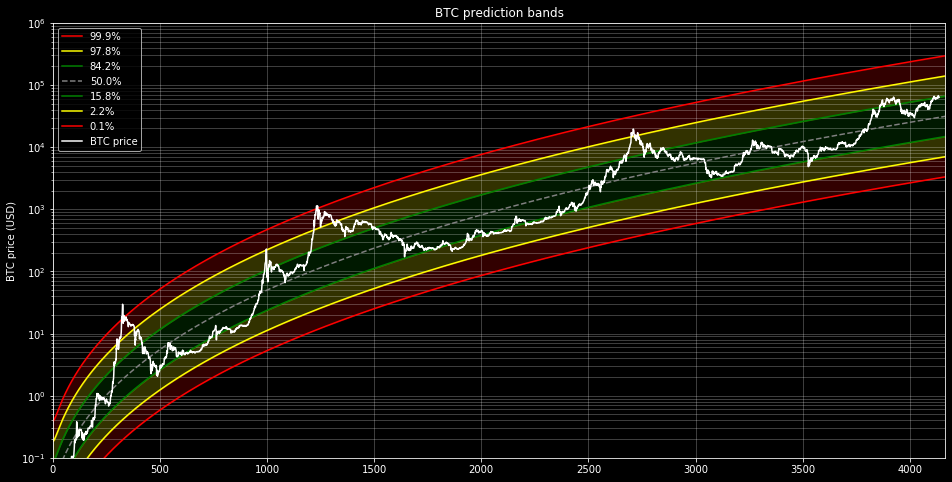

In [35]:
#Plots regresion bands
fig, ax1 = plt.subplots()
plt.ylim(min_price_plot,max_price_plot*10)

ax1.set_title(coin_name + " prediction bands")
ax1.set_ylabel(coin_name + " price (USD)")

#Defines if logarithmic graph
log_val = True

#Plots regression bands
df_projected.plot(kind = "line", y = "plus_3STDV", logy=log_val, ax = ax1, secondary_y = False, c = "red", label="99.9%")
df_projected.plot(kind = "line", y = "plus_2STDV", logy=log_val, ax = ax1, secondary_y = False, c = "yellow", label="97.8%")
df_projected.plot(kind = "line", y = "plus_1STDV", logy=log_val, ax = ax1, secondary_y = False, c = "green", label="84.2%")
df_projected.plot(kind = "line", y = "price_reg", logy=log_val, ax = ax1, secondary_y = False, c = "grey", linestyle='dashed', label="50.0%")
df_projected.plot(kind = "line", y = "minus_1STDV", logy=log_val, ax = ax1, secondary_y = False, c = "green", label="15.8%")
df_projected.plot(kind = "line", y = "minus_2STDV", logy=log_val, ax = ax1, secondary_y = False, c = "yellow", label="2.2%")
df_projected.plot(kind = "line", y = "minus_3STDV", logy=log_val, ax = ax1, secondary_y = False, c = "red", label="0.1%")

#color bands
ax1.fill_between(df_projected.index, y1 = df_projected["plus_3STDV"], y2 = df_projected["plus_2STDV"], color='r', alpha=.2)
ax1.fill_between(df_projected.index, y1 = df_projected["plus_2STDV"], y2 = df_projected["plus_1STDV"], color='yellow', alpha=.2)
ax1.fill_between(df_projected.index, y1 = df_projected["minus_1STDV"], y2 = df_projected["plus_1STDV"], color='g', alpha=.2)
ax1.fill_between(df_projected.index, y1 = df_projected["minus_3STDV"], y2 = df_projected["minus_2STDV"], color='r', alpha=.2)
ax1.fill_between(df_projected.index, y1 = df_projected["minus_2STDV"], y2 = df_projected["minus_1STDV"], color='yellow', alpha=.2)

#Plots closing price
df_projected.plot(kind = "line", y = "close", logy=log_val, ax = ax1, secondary_y = False, c = "white", label= coin_name + " price")

#Creates grid
plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.3)

#Save regression bands 
plt.savefig("BTC_reg_bands.png")

plt.show()

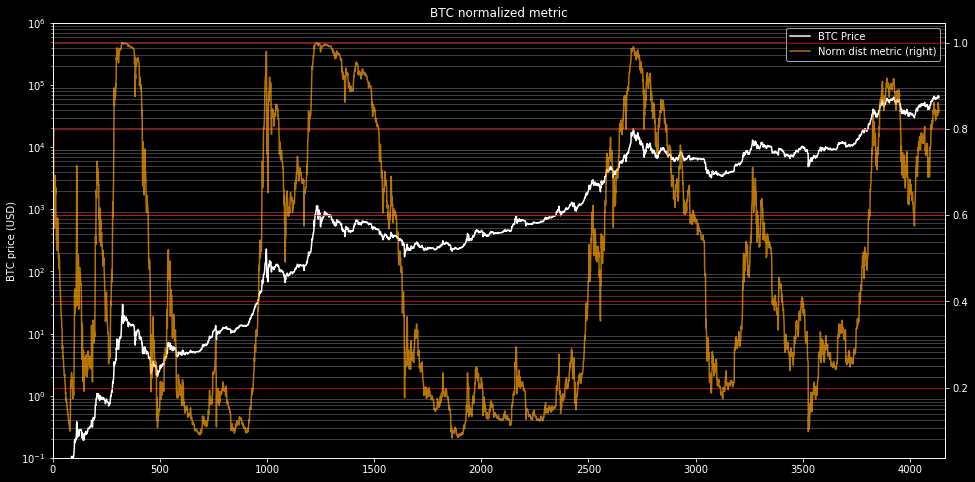

In [36]:
#Plots Normal distribution metric
fig, ax2 = plt.subplots()
plt.ylim(min_price_plot,max_price_plot*10)

ax2.set_title(coin_name + " normalized metric")
ax2.set_ylabel(coin_name + " price (USD)")

#plots Price
df_projected.plot(kind = "line", y = "close", logy=True, ax = ax2, secondary_y = False, c = "white", label= coin_name + " Price")
plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.3, c = "white")

#plots normalization
df_projected.plot(kind = "line", y = "norm_dist", logy = False, ax = ax2, secondary_y = True, c = "orange", label = "Norm dist metric", alpha=.7)
plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.9, c = "red")

#Save regression bands 
plt.savefig("BTC_norm_dist_metric.png")

plt.show()

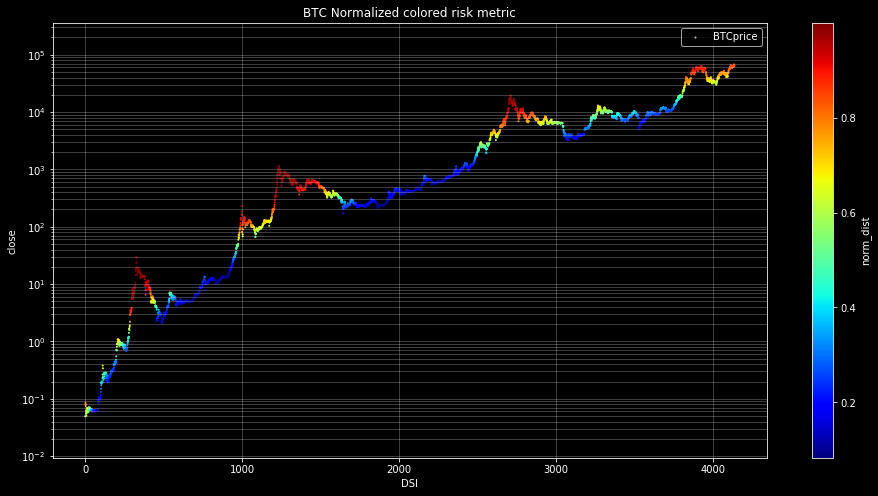

In [37]:
#Plots normal distribution metric in colored graph
fig, ax3 = plt.subplots()
ax3.set_title( coin_name + " " + "Normalized" + " colored risk metric")
ax3.set_ylabel(coin_name + " price (USD)")

df_projected.plot(kind = "scatter", x = "DSI", y = "close", c= 'norm_dist', s = 1, cmap = "jet", logy=True, ax = ax3, secondary_y = False, label= coin_name + 'price')
plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.3)

#Save regression bands 
plt.savefig("BTC_norm_dist_color_metric.png")

plt.show()

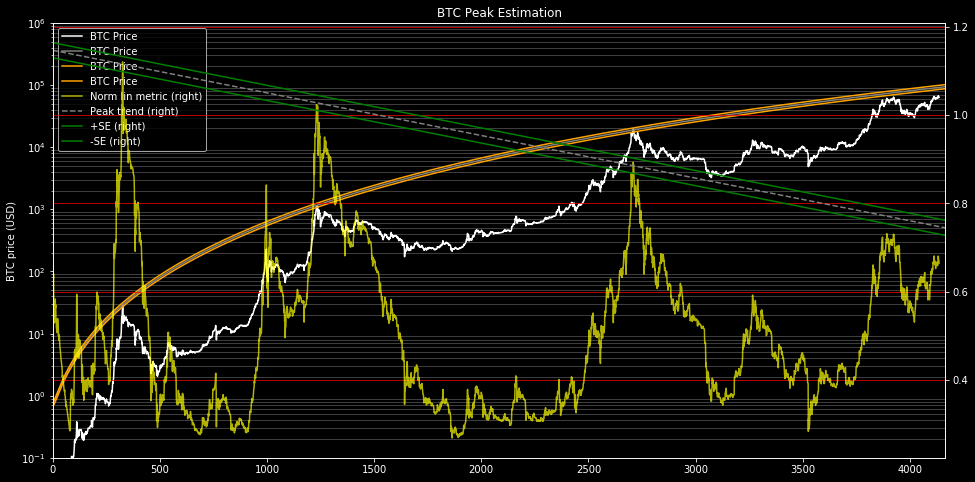

In [38]:
#Plots the peak projection regression
fig, ax4 = plt.subplots()
plt.ylim(min_price_plot,max_price_plot*10)

ax4.set_title(coin_name + " Peak Estimation")
ax4.set_ylabel(coin_name + " price (USD)")

#plots Price
df_projected.plot(kind = "line", y = "close", logy=True, ax = ax4, secondary_y = False, c = "white", label= coin_name + " Price")
df_projected.plot(kind = "line", y = "peak_price", logy=True, ax = ax4, secondary_y = False, c = "grey", label= coin_name + " Price")
df_projected.plot(kind = "line", y = "peak_price_plus_STDV", logy=True, ax = ax4, secondary_y = False, c = "orange", label= coin_name + " Price")
df_projected.plot(kind = "line", y = "peak_price_minus_STDV", logy=True, ax = ax4, secondary_y = False, c = "orange", label= coin_name + " Price")

plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.3, c = "white")

#plots normalization
df_projected.plot(kind = "line", y = "norm_lin", logy = False, ax = ax4, secondary_y = True, c = "yellow", label = "Norm lin metric", alpha=.7)
df_projected.plot(kind = "line", y = "peak_trend", logy = False, ax = ax4, secondary_y = True, c = "grey", linestyle='dashed', label = "Peak trend", alpha=1)
df_projected.plot(kind = "line", y = "peak_trend_plus_STDV", logy = False, ax = ax4, secondary_y = True, c = "green", label = "+SE", alpha=1)
df_projected.plot(kind = "line", y = "peak_trend_minus_STDV", logy = False, ax = ax4, secondary_y = True, c = "green", label = "-SE", alpha=1)
  
#Creates grid
plt.grid(b=True, which = 'both', axis = 'both', alpha = 0.9, c = "red")

#Save regression bands 
plt.savefig("Peak projections.png")

plt.show()